In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
input_shape = (28, 28, 1)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=200, epochs=30, validation_data=(x_test, y_test_cat), validation_split = 0.2)


Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.1353 - val_accuracy: 0.9780
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.1228 - val_accuracy: 0.9808
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 7.9140e-04 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy: 0.9816
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 1.8466e-04 - accuracy: 1.0000 - val_loss: 0.1188 - val_accuracy: 0.9822
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 6.7308e-05 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9818
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 5.1790e-05 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9820
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 4.3180e-05 - accuracy: 1.0000 - val_loss: 0.1195 - val_acc

In [12]:
accur = model.evaluate(x_test, y_test_cat)
print(f' точность прогноза тестирования данных {round(accur[1] * 100, 4)}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9831
 точность прогноза тестирования данных 98.31%


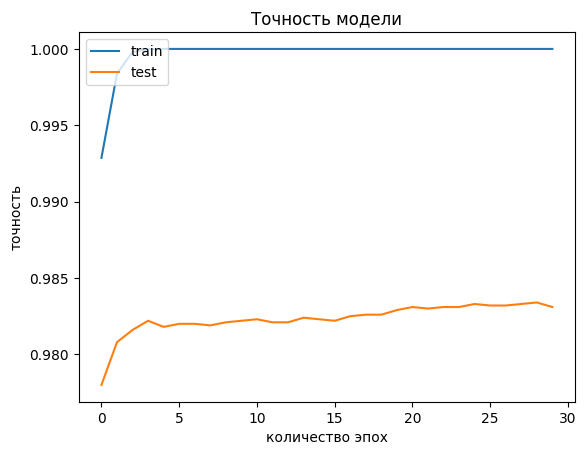

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

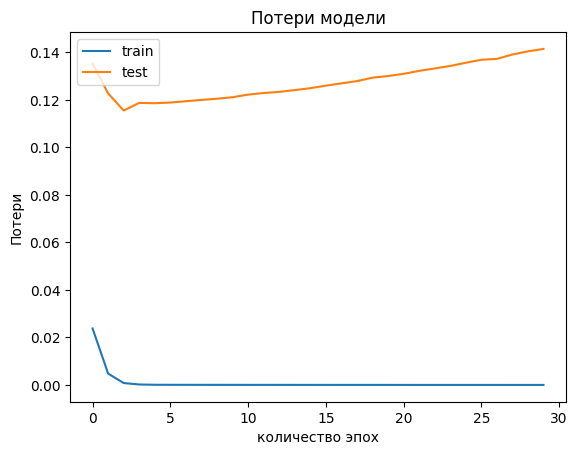

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image

img = image.load_img("./images_folder/5.jpg")
img = img.resize((28, 28))
img = img.convert("L")
img = np.array(img)
img = img.reshape(1, 28, 28)
img = img / 255.0
prediction = model.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)

1/1 [==============================] - 0s 25ms/step
цифра: 5
